In [11]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

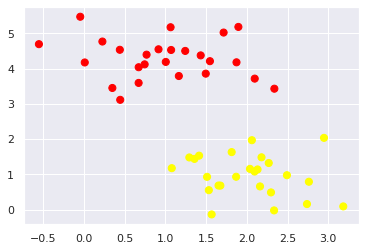

In [12]:
import seaborn as sns;
sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='autumn');
print(X,y)

(-1.0, 3.5)

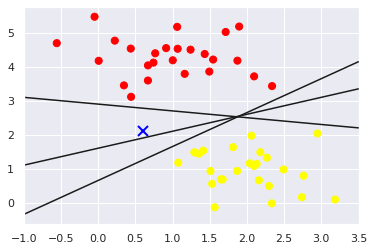

In [16]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1],'x',color="blue", markeredgewidth=2,markersize=10)
for m, b in [(1,0.65),(0.5,1.6),(-0.2, 2.9)]:
  plt.plot(xfit, m*xfit + b, '-k')
plt.xlim(-1,3.5)

In [17]:
# for m, b, d in [(1,0.65, 0.33), (0.5,1.6,0.55),(-0.2,2.9,0.2)]:
#   yfit=m*xfit+b
#   plt.plot(xfit,yfit,"-k")

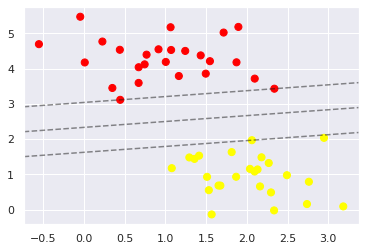

In [18]:
from sklearn.svm import SVC
model=SVC(kernel="linear",C=1E10)
model.fit(X,y)

SVC(C=10000000000.0,kernel='linear')
def plot_svc_decision_function(model, ax=None, plot_support=True):
  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y,x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors='k', levels=[-1,0,1],alpha=0.5,linestyles=['--','--'])
  if plot_support:
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:,1],
               s=300, linewidth=1, facecolors='none');
  ax.set_xlim(xlim)
  ax.set_ylim(ylim)

plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);


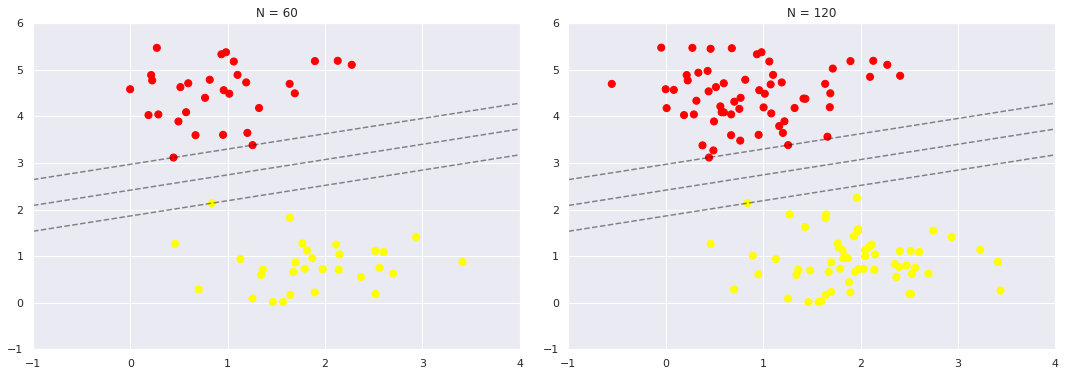

In [22]:
def plot_svm(N=10, ax=None):
  X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
  X = X[:N]
  y = y[:N]
  model = SVC(kernel='linear', C=1E10)
  model.fit(X, y)

  ax = ax or plt.gca()
  ax.scatter(X[:, 0], X[:,1], c=y, s=50, cmap='autumn')
  ax.set_xlim(-1, 4)
  ax.set_ylim(-1, 6)
  plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1,2,figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
  plot_svm(N, axi)
  axi.set_title('N = {0}'.format(N))


In [23]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

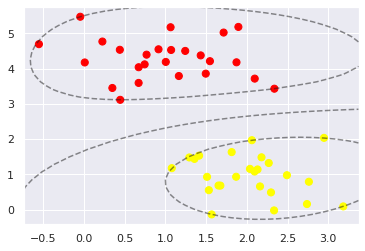

In [27]:
clf = SVC(kernel = 'rbf', C=1E6) #Regularization parameter rbf, sigmoid poly
clf.fit(X,y)

SVC(C=1000000.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

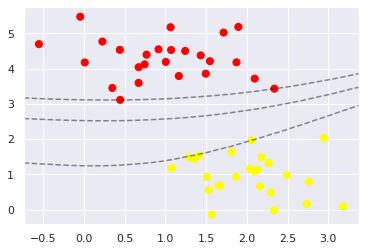

In [28]:
clf = SVC(kernel = 'poly', C=1E6) #Regularization parameter rbf, sigmoid poly
clf.fit(X,y)

SVC(C=1000000.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

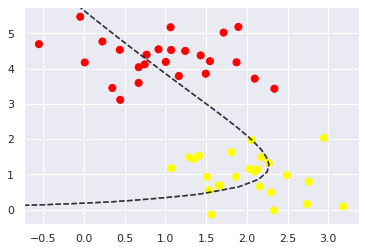

In [29]:
clf = SVC(kernel = 'sigmoid', C=1E6) #Regularization parameter rbf, sigmoid poly
clf.fit(X,y)

SVC(C=1000000.0)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');